In [1]:
#fix for scipy version 1.0.0, if using another version or new scikit-learn, could be removed
from scipy.sparse.csgraph import laplacian as csgraph_laplacian

## Here we import the important modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## We create a dataset of 2 circles, inner circle and outer circle

In [3]:
from sklearn.datasets import make_circles

n_samples = 200
X, y = make_circles(n_samples=n_samples, shuffle=False)
outer, inner = 0, 1
labels = -np.ones(n_samples)
labels[0] = outer
labels[-100] = inner

Text(0.5,1,'Raw data (2 classes=outer and inner)')

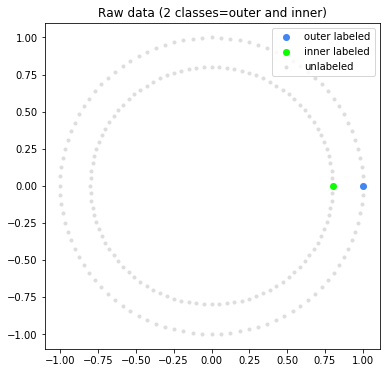

In [4]:
plt.figure(figsize=(6, 6))
plt.scatter(X[labels == outer, 0], X[labels == outer, 1], color='#4286f4',
            marker='o', lw=0, label="outer labeled", s=50)
plt.scatter(X[labels == inner, 0], X[labels == inner, 1], color='#0cff00',
            marker='o', lw=0, label='inner labeled', s=50)
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], color='#dddddd',
            marker='.', label='unlabeled')
plt.legend(scatterpoints=1, shadow=False, loc='upper right')
plt.title("Raw data (2 classes=outer and inner)")

## Create a machine learning model and train it on the original dataset

In [5]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 1)

X_orig = X[labels != -1]
labels_orig = labels[labels != -1]

clf.fit(X_orig, labels_orig)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Text(0.5,1,'Raw data (2 classes=outer and inner)')

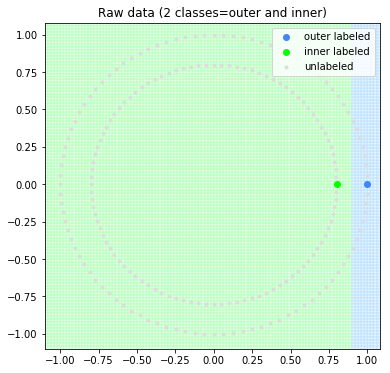

In [6]:
plt.figure(figsize=(6, 6))

from matplotlib.colors import ListedColormap
h = .02
cmap_light = ListedColormap(['#bfe3ff', '#baffc1'])
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha = 0.3, edgecolors = 'face')

plt.scatter(X[labels == outer, 0], X[labels == outer, 1], color='#4286f4',
            marker='o', lw=0, label="outer labeled", s=50)
plt.scatter(X[labels == inner, 0], X[labels == inner, 1], color='#0cff00',
            marker='o', lw=0, label='inner labeled', s=50)
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], color='#dddddd',
            marker='.', label='unlabeled')
plt.legend(scatterpoints=1, shadow=False, loc='upper right')
plt.title("Raw data (2 classes=outer and inner)")

##  <span style="color:red"> We create our semi-supervised model label_prop <span>
<hr>
###  <span style="color:red"> ------------------------------------------------------------------------------- <span>

In [7]:
from sklearn.semi_supervised import label_propagation
label_prop = label_propagation.LabelSpreading(kernel='knn', alpha=0.8, max_iter=30)

In [8]:
label_prop.fit(X, labels)

LabelSpreading(alpha=0.8, gamma=20, kernel='knn', max_iter=30, n_jobs=1,
        n_neighbors=7, tol=0.001)

###  <span style="color:red"> ------------------------------------------------------------------------------- <span>

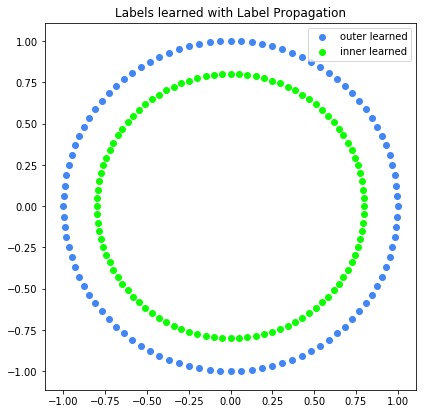

In [9]:
output_labels = label_prop.transduction_
plt.figure(figsize=(6, 6))
output_label_array = np.asarray(output_labels)
outer_numbers = np.where(output_label_array == outer)[0]
inner_numbers = np.where(output_label_array == inner)[0]
plt.scatter(X[outer_numbers, 0], X[outer_numbers, 1], color='#4286f4',
            marker='o', lw=0, s=50, label="outer learned")
plt.scatter(X[inner_numbers, 0], X[inner_numbers, 1], color='#0cff00',
            marker='o', lw=0, s=50, label="inner learned")
plt.legend(scatterpoints=1, shadow=False, loc='upper right')
plt.title("Labels learned with Label Propagation")

plt.subplots_adjust(left=0.07, bottom=0.07, right=0.93, top=0.92)
plt.show()


## Train the original classifier clf on the new dataset

In [10]:
clf.fit(X, output_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

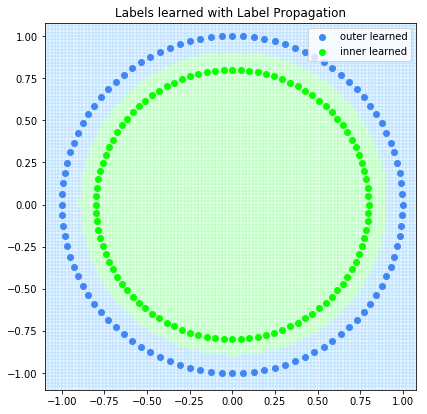

In [11]:
output_labels = label_prop.transduction_
plt.figure(figsize=(6, 6))

plt.figure(figsize=(6, 6))

from matplotlib.colors import ListedColormap
h = .02
cmap_light = ListedColormap(['#bfe3ff', '#baffc1'])
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha = 0.3, edgecolors = 'face')

output_label_array = np.asarray(output_labels)
outer_numbers = np.where(output_label_array == outer)[0]
inner_numbers = np.where(output_label_array == inner)[0]
plt.scatter(X[outer_numbers, 0], X[outer_numbers, 1], color='#4286f4',
            marker='o', lw=0, s=50, label="outer learned")
plt.scatter(X[inner_numbers, 0], X[inner_numbers, 1], color='#0cff00',
            marker='o', lw=0, s=50, label="inner learned")
plt.legend(scatterpoints=1, shadow=False, loc='upper right')
plt.title("Labels learned with Label Propagation")

plt.subplots_adjust(left=0.07, bottom=0.07, right=0.93, top=0.92)
plt.show()